# RSA! 
... real quick.

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import h5py

# pycortex, because fancy
import cortex as cx

# Distance functions
from scipy.spatial import distance as scidist

%matplotlib inline

In [24]:
# Load data
with h5py.File('/unrshare/LESCROARTSHARE/IntroToEncodingModels/s01_color_natims_data.hdf') as hf:
    val = hf['val'].value
    mask = hf['mask'].value

In [19]:
# Load ROI masks
subject, transform = 's01', 'color_natims'
roi_masks = cx.get_roi_masks(subject, transform, roi_list=['V1', 'V2', 'PPA', 'FFA'])

Cutting 4 overlapping voxels (should be < ~50)


In [35]:
# Load models
with h5py.File('/unrshare/LESCROARTSHARE/IntroToEncodingModels/color_natims_features_19cat.hdf') as hf:
    Xsem = hf['val'].value
with h5py.File('/unrshare/LESCROARTSHARE/IntroToEncodingModels/color_natims_features_fft.hdf') as hf:
    Xfft = hf['val'].value    

In [56]:
rois = ['V1','FFA','PPA']

In [25]:
# Select voxels in each ROI
val_masked = {}
rois = ['V1','FFA','PPA']
for m in rois:
    tmp_mask = roi_masks[m][mask]
    val_masked[m] = val[:, tmp_mask]

In [40]:
# Compute a single RDM for V1
d_ffa = scidist.pdist(val_masked['FFA'], metric='euclidean')
d_ffa = scidist.squareform(d_ffa)
# Compute an RDM for the 19-category semantic model
d_sem = scidist.pdist(Xsem, metric='euclidean')
d_sem = scidist.squareform(d_sem)

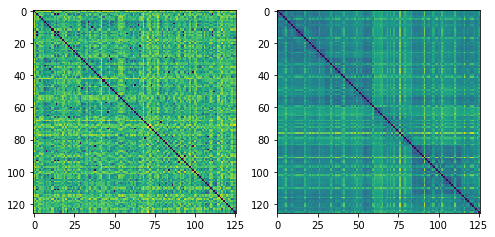

In [41]:
fig, axs = plt.subplots(1, 2, figsize=(8, 4))
axs[0].imshow(d_sem)
axs[1].imshow(d_ffa)

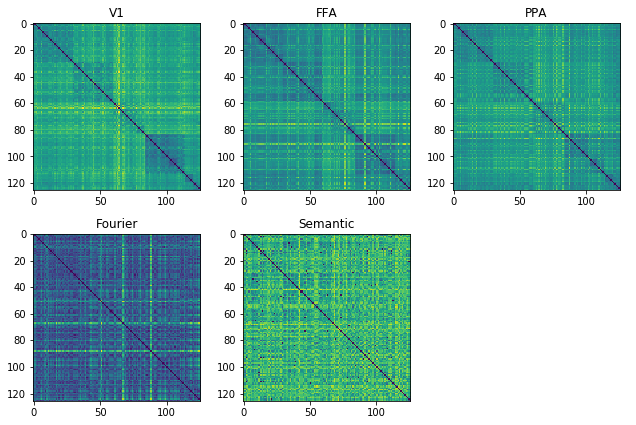

In [58]:
metric = 'euclidean'
# Same for all models, ROIs
fig, axs = plt.subplots(2, 3, figsize=(9,6))
for roi, ax in zip(rois, axs[0]):
    d = scidist.pdist(val_masked[roi], metric=metric)
    d = scidist.squareform(d)
    ax.imshow(d)
    ax.set_title(roi)

for model, modelname, ax in zip([Xfft, Xsem], ['Fourier', 'Semantic'], axs[1]):
    d = scidist.pdist(model, metric=metric)
    d = scidist.squareform(d)
    ax.imshow(d)
    ax.set_title(modelname)
axs[1,2].axis('off')
plt.tight_layout()

In [61]:
scidist.pdist?

In [67]:
np.linalg.inv(val_masked['V1'].dot(val_masked['V1'].T))

array([[0.01608485, 0.0039873 , 0.00502788, ..., 0.00670423, 0.00580779,
        0.00609885],
       [0.0039873 , 0.01584951, 0.00361011, ..., 0.0077049 , 0.00612511,
        0.00427373],
       [0.00502788, 0.00361011, 0.01313201, ..., 0.00565779, 0.00616669,
        0.00585137],
       ...,
       [0.00670423, 0.0077049 , 0.00565779, ..., 0.01798724, 0.00743907,
        0.00263368],
       [0.00580779, 0.00612511, 0.00616669, ..., 0.00743907, 0.01331305,
        0.00380166],
       [0.00609885, 0.00427373, 0.00585137, ..., 0.00263368, 0.00380166,
        0.01768593]], dtype=float32)

In [62]:
d = scidist.pdist(val_masked['V1'], metric='mahalanobis')

ValueError: The number of observations (126) is too small; the covariance matrix is singular. For observations with 482 dimensions, at least 483 observations are required.

ValueError: The number of observations (126) is too small; the covariance matrix is singular. For observations with 482 dimensions, at least 483 observations are required.

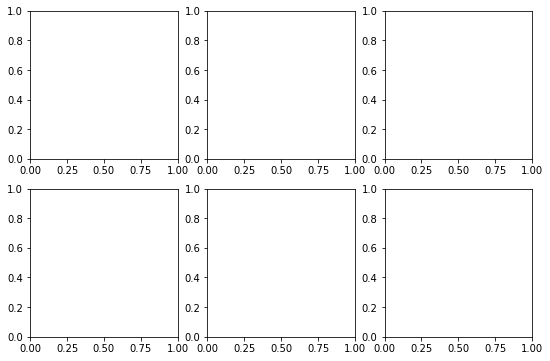

In [59]:
metric = 'mahalanobis'
# Same for all models, ROIs
fig, axs = plt.subplots(2, 3, figsize=(9,6))
for roi, ax in zip(rois, axs[0]):
    d = scidist.pdist(val_masked[roi], metric=metric, )
    d = scidist.squareform(d)
    ax.imshow(d)
    ax.set_title(roi)

for model, modelname, ax in zip([Xfft, Xsem], ['Fourier', 'Semantic'], axs[1]):
    d = scidist.pdist(model, metric=metric)
    d = scidist.squareform(d)
    ax.imshow(d)
    ax.set_title(modelname)
axs[1,2].axis('off')
plt.tight_layout()

# When do rank-order and Pearson correlation differ? 

<function numpy.lib.function_base.corrcoef>

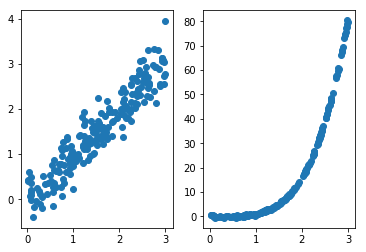

In [48]:
# (When scales of differences differ)
from scipy.stats import spearmanr
x = np.random.rand(200,) * 3
noise = np.random.randn(200,) * 0.3
y = x + noise
y_nl = x**4 + noise
fig, ax = plt.subplots(1, 2)
ax[0].scatter(x, y)
ax[1].scatter(x, y_nl)
np.corrcoef

In [50]:
print(np.corrcoef(x, y)[0,1])
print(np.corrcoef(x, y_nl)[0,1])

0.9436987372480753
0.8688894649102964


In [53]:
print(spearmanr(x, y)[0])
print(spearmanr(x, y_nl)[0])

0.9496872421810546
0.9863196579914499
